In [1]:
#imports
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import pandas as pd #dataframes
#import cv2 as cv
import PIL #image analysis
import glob #for getting list of files in a directory
import os #for file paths
import imagej

In [2]:
ij = imagej.init()

# Noise Reduction

## Image Average and Static Subtraction
This program helps remove noise from images by averaging them out and subtracting the average static from them. It opens an image file that contains both pictures and images of static, sorts them into their respective categories, averages them, and the subtracts the average static from the average picture. It also works with a specific file structure of a category folder containing multiple image folders by searching through the category folder for image folders and then condensing each image folder into a static-reduced average.

Note:
- the file structure is important, need to manually make a receptacle file in the composites folder to process new images
- all images must have the same dimensions
- could condense with functions
- as of now, the static subtraction doesn't work as intended

## Test Code for Program

In [ ]:
# prototype
path = '/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry'

# Loop that finds the directoy of all the image forlders inside the category folder
for wavelength in next(os.walk(path))[1]:
    wave_dir = os.path.join(path, wavelength)
    
    # Prepares a list for the pictures to be stored in and then unloads all the pictures in an image folder into it
    pictures = []
    pictures.clear()
    for picture in glob.glob(wave_dir + '/*'):
        pictures.append(np.array(PIL.Image.open(picture)).astype(np.uint16))

    # Preparing for stacking and averaging the pictures. 
    interest = np.zeros(pictures[0].shape) #array
    interestCount = 0 #for averaging the stacked image
    size = (interest.size) #for getting the average brightness

    # Stacking and counting the pictures. Pictures are filtered by their higher average brightness than static images
    for image in pictures:   
        if image.sum()/size > 10: 
            interest += image
            interestCount += 1
            
    # Static image array preparation. 
    statics = np.zeros(pictures[0].shape) 
    staticCount = 0 
    
    # Stacking and counting static images.
    for static in pictures:
        if static.sum()/size < 10: 
            statics += static
            staticCount += 1
    
    # Setting up the file pathing to for result files
    sand_images = os.path.dirname(path) 
    category = os.path.basename(path)
    pre_path = os.path.join(sand_images, 'Composites', category, wavelength)

    # if/else averages images, also checks to see if there are static images that can be subtracted from the main images and operates accordingly
    # Image file names are marked with a '-' if were subtracted from
    if staticCount < 1:
        result = (interest/interestCount).astype(np.uint8)
        img = PIL.Image.fromarray(result)
        fileName = pre_path + '.png'
        img.save(fileName)
        print(fileName)

    else:
        result = (interest/interestCount).astype(np.uint8) - (statics/staticCount).astype(np.uint8)
        img = PIL.Image.fromarray(result)
        fileName = pre_path + '-.png'
        img.save(fileName)
        print(fileName)

In [4]:
# searching the category folder for image folder and then getting their paths 
path = "/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry"

for wavelength in next(os.walk(path))[1]:
    wave_dir = os.path.join(path, wavelength)
    print(wave_dir)

/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0525
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0630
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0870
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0935
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0590
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/1020
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0770
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0455
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0365_L
/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0850


In [4]:
path = '/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0455'

#list to store picture arrays in
pictures = []
pictures.clear()

#getting the pictures from the directory and converting them into picture arrays and compiling them into a list
for name in glob.glob(path + '/*'): #picture directory
    pictures.append(np.array(PIL.Image.open(name)).astype(np.uint16))

pictures

[array([[154, 157, 154, ..., 160, 157, 157],
        [156, 157, 156, ..., 157, 158, 156],
        [157, 157, 156, ..., 154, 158, 159],
        ...,
        [140, 139, 139, ..., 110, 111, 113],
        [142, 139, 140, ..., 110, 111, 111],
        [141, 140, 140, ..., 114, 114, 111]], dtype=uint16),
 array([[156, 156, 155, ..., 155, 158, 159],
        [154, 153, 155, ..., 158, 156, 156],
        [157, 155, 156, ..., 157, 158, 159],
        ...,
        [138, 138, 137, ..., 111, 112, 110],
        [143, 140, 138, ..., 112, 110, 112],
        [142, 139, 141, ..., 111, 111, 112]], dtype=uint16),
 array([[0, 0, 0, ..., 3, 2, 0],
        [0, 0, 2, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 4, 0],
        ...,
        [3, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 1, 0, 0],
        [0, 0, 5, ..., 1, 0, 1]], dtype=uint16),
 array([[0, 0, 3, ..., 0, 0, 7],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 2, ..., 6, 0, 0],
        ...,
        [0, 0, 0, ..., 3, 0, 0],
        [2, 0, 7, ..., 0, 0, 0

In [9]:
# stacking the pictures
interest = np.zeros(pictures[0].shape)
interestCount = 0 
size = pictures[0].size

for image in pictures:   
    if image.sum()/size > 10: # a filter that excludes the static images
        interest += image
        interestCount += 1

print('number of images:',interestCount)        
print('images stacked:')  
print((interest/interestCount).astype(np.uint8))

In [8]:
# stacking the static
statics = np.zeros(pictures[0].shape)
staticCount = 0 
size = pictures[0].size

for static in pictures:   
    if static.sum()/size < 10: # a filter that excludes the static images
        statics += static
        staticCount += 1

print('number of static:',staticCount)        
print('static stacked:')  
print((statics/staticCount).astype(np.uint8))

number of static: 10
static stacked:
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
number of images: 10
images stacked:
[[156 156 155 ... 157 157 158]
 [155 155 156 ... 157 157 157]
 [155 155 155 ... 157 156 157]
 ...
 [138 139 138 ... 110 110 110]
 [141 140 139 ... 112 111 111]
 [140 140 140 ... 112 111 112]]
/Users/fanjx1/Documents/SandImages/Composites/*750um*/*
/Users/fanjx1/Documents/SandImages/Composites
Error in callback <function _draw_all_if_interactive at 0x10f9fbba0> (for post_execute):
Error in callback <function _draw_all_if_interactive at 0x10f9fbba0> (for post_execute):
Error in callback <function flush_figures at 0x16f5c4c20> (for post_execute):


In [25]:
#prototype pathing and file export

#setup for file pathing 
folder = os.path.dirname(path) 
category = os.path.basename(folder)

#averages images, also checks to see if there are static images that can be subtracted from the main images and operates accordingly
#image file names are marked with a '-' if were subtracted from
if staticCount < 1:
    result = (interest/interestCount).astype(np.uint8)
    img = PIL.Image.fromarray(result)
    base = os.path.basename(path) + '.png'
    fileName = os.path.join(os.path.dirname(folder), 'Composites', category, base)
    img.save(fileName)

else:
    result = (interest/interestCount).astype(np.uint8) - (statics/staticCount).astype(np.uint8)
    img = PIL.Image.fromarray(result)
    base = os.path.basename(path) + '-.png'
    fileName = os.path.join(os.path.dirname(folder), 'Composites', category, base)
    img.save(fileName)

print(fileName)
print('result:')
result

NameError: name 'staticCount' is not defined

In [35]:
#for saving an image of the average static
img = PIL.Image.fromarray((statics).astype(np.uint8))
folder = os.path.dirname(path) 
category = os.path.basename(folder)
base = os.path.basename(path) + 'statics.png'
fileName = os.path.join(os.path.dirname(folder), 'Composites', category, base)
img.save(fileName)
print(fileName)

/Users/fanjx1/Documents/SandImages/Composites/ParaffinWax-Dry/0455statics.png


In [23]:
#listing average values of each photo
values = []
values.clear()
size = pictures[0].size

for picture in pictures:

    values.append(picture.sum()/size)
    
values

[125.25056440845569,
 125.25849859174438,
 0.4769564075630252,
 0.4728326426724536,
 125.2704769407763,
 125.27198619832548,
 0.4752468295010312,
 125.26375237595038,
 0.47571745044171515,
 125.2690477633361,
 125.23807311386093,
 0.4759483120171145,
 125.26317209576138,
 0.48044386023640223,
 125.24415655685351,
 0.4738229426385939,
 0.47394967602425586,
 0.47569821197709855,
 125.27465000423246,
 0.4837449402838058]

In [22]:
#finding the unique values in the average of static array
staticValues = pd.DataFrame(statics/staticCount).astype(np.uint8).stack().value_counts()
np.array(sorted([*staticValues.index]))

NameError: name 'statics' is not defined

# Image Statistics

## Material Histograms by Wavelength

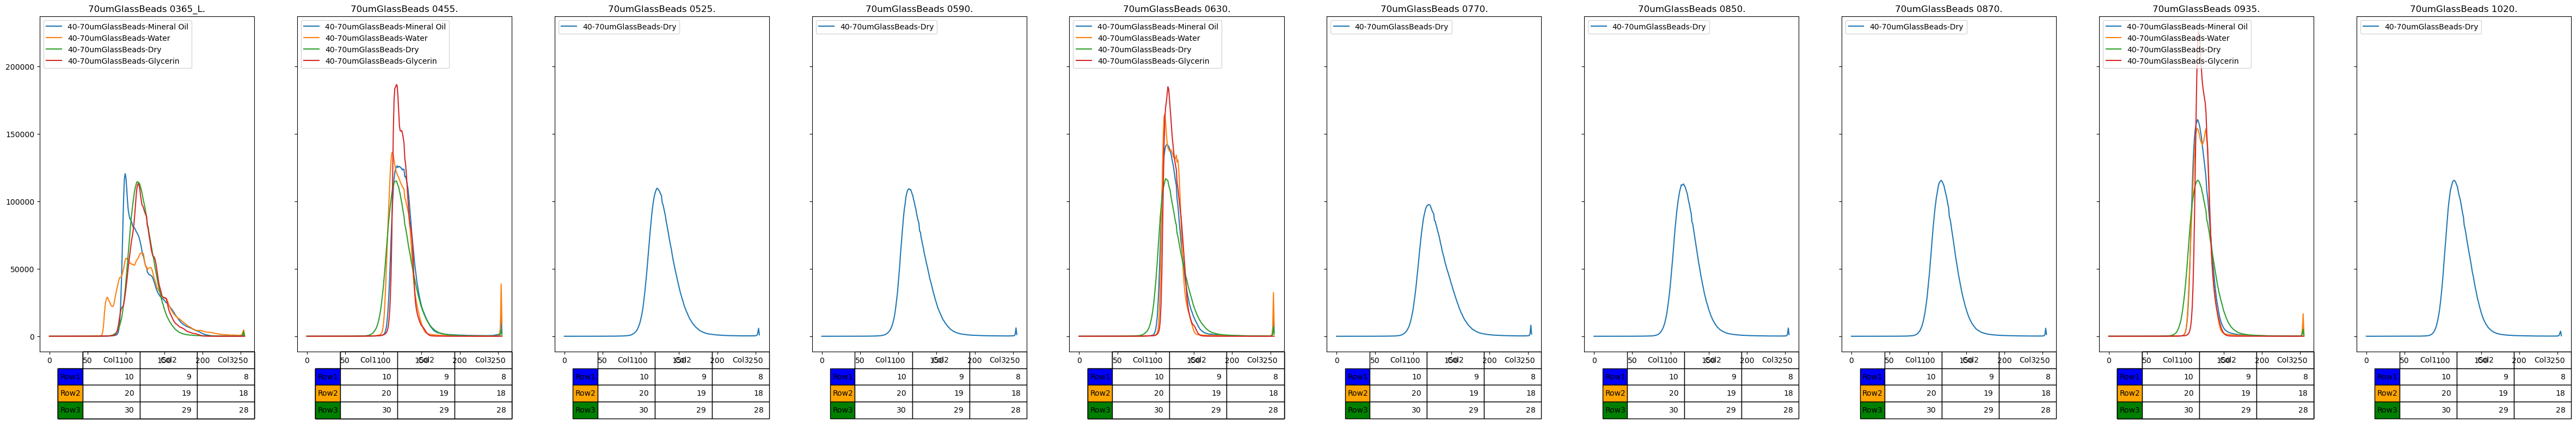

In [167]:
def axCreator(list):
     dict = {}
     for i in [*range(len(list))]:
          dict[i] = "ax" + '[0,' + str(i) + ']'
     return dict

def hist(ax_number, image, label):
     ax = ax_number.plot(pd.DataFrame(PIL.Image.open(image).histogram()), label = name)
     ax_number.legend(loc='upper left') #bbox_to_anchor=(0.5, -0.1)
     return ax

def waveList(addr):
     wavelengths = []
     addresses = glob.glob(search)
     for address in addresses:
          wavelengths.append(os.path.basename(address))
     return [*np.unique(wavelengths)]


# User input
material = "70umGlassBeads"

#finding the wavelengths present in the folder
base = '/Users/fanjx1/Documents/SandImages/'
search = os.path.join(base, 'Composites', '*' + material + '*', '*')
waves = waveList(search)

axList = axCreator(waves)
#display(axList)


fig1, axList = plt.subplots(1,len(axList), figsize = ((len(axList)*6),8), sharey = True)

col_labels = ['Col1','Col2','Col3']
row_labels = ['Row1','Row2','Row3']
table_vals = pd.DataFrame([[10, 9, 8], 
                          [20, 19, 18], 
                          [30, 29, 28]])

#
axCount = 0
for wave in waves:
     materialsInWave = glob.glob('/Users/fanjx1/Documents/SandImages/Composites/*' + material + '*/*' + wave + '*')
     #display(materialsInWave)
     for mat in materialsInWave:
          name = os.path.basename(os.path.dirname(mat))
          hist(axList[axCount], mat, name)
          axList[axCount].set_title(material + " " + wave.replace('-','')[:-4])
          mpl.table.table(axList[axCount],
                          cellText=table_vals.values,
                          colLabels = col_labels,
                          rowLabels = row_labels,
                          rowColours= ['blue', 'orange', 'green'],
                          bbox = (0.2,-0.2,0.8,0.2))
          
     axCount += 1
pictureName = material + 'Histogram.png'
plt.savefig(os.path.join(base, 'ImageStatistics', pictureName), bbox_inches = 'tight')

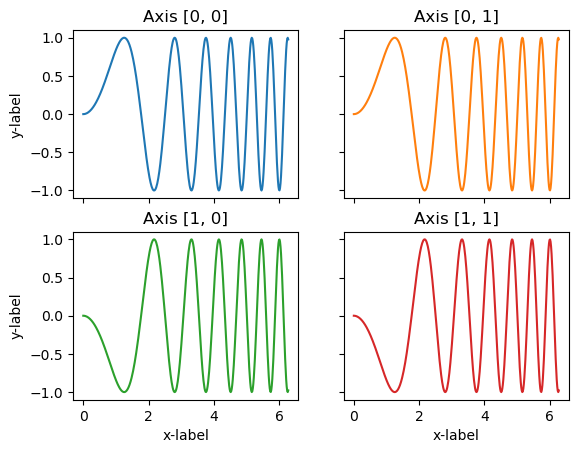

In [70]:
#stacking plot and graph together
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

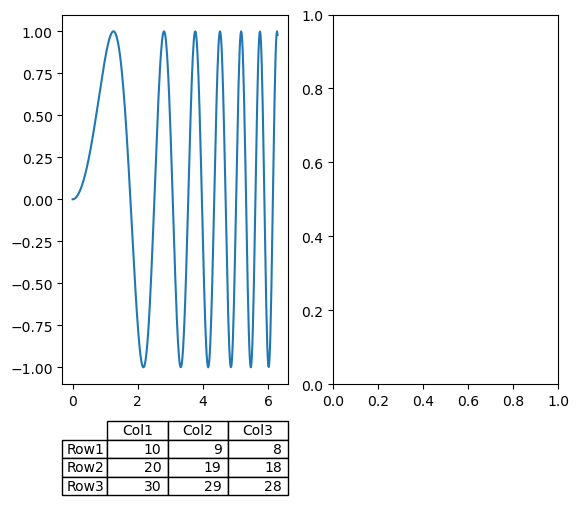

In [138]:
#subplot testing
fig, ax = plt.subplots(1,2)

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

col_labels = ['Col1','Col2','Col3']
row_labels = ['Row1','Row2','Row3']
table_vals = pd.DataFrame([[10, 9, 8], 
                          [20, 19, 18], 
                          [30, 29, 28]])

ax[0].plot(x,y)

mpl.table.table(ax[0],
                cellText=table_vals.values,
                colLabels = col_labels,
                rowLabels = row_labels,
                bbox = (0.2,-0.3,0.8,0.2))


In [ ]:
#Manual Material Histogram by Wavelength
def hist1(image, name):
    return ax1.plot(pd.DataFrame(PIL.Image.open(image).histogram()), label = name)

def hist2(image, name):
   return ax2.plot(pd.DataFrame(PIL.Image.open(image).histogram()), label = name)

# User input
material1 = "Walnut"
wavelength1 = "770"

#Setups 
search = '/Users/fanjx1/Documents/SandImages/Composites/*' + material1 + '*/*' + wavelength1 + '*'

fig1, [ax1, ax2] = plt.subplots(1,2, figsize = (10,6))

#
for file in glob.glob(search, recursive=True):
    name = os.path.basename(os.path.dirname(file)) #for comparing different materials
    #name = os.path.basename(file) #for comparing wavelengths
    hist1(file, name)
    
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
ax1.set_title(wavelength1 + 'nm')




material2 = "Walnut"
wavelength2 = "850"

#Setups 
search = '/Users/fanjx1/Documents/SandImages/Composites/*' + material2 + '*/*' + wavelength2 + '*'

#
for file in glob.glob(search, recursive=True):
    name = os.path.basename(os.path.dirname(file)) #for comparing different materials
    #name = os.path.basename(file) #for comparing wavelengths
    hist2(file, name)
    
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
ax2.set_title(wavelength2 + 'nm')


In [ ]:
#Wavelength Histogram by Material
def hist(image, name):
    return ax.plot(pd.DataFrame(PIL.Image.open(image).histogram()), label = name)

# User input
material = "Walnut*Oil 2-1"
wavelengths = []

#Setups 
search = '/Users/fanjx1/Documents/SandImages/Composites/*' + material + '*/*'

fig = plt.figure(figsize =(5, 4)) 
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#
for file in glob.glob(search, recursive=True):
    name = os.path.basename(os.path.dirname(file)) #for comparing different materials
    name = os.path.basename(file) #for comparing wavelengths
    hist(file, name)
    
ax.legend()

plt.show() 

In [ ]:
#Manual Histogram

comparisonOne = PIL.Image.open('/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Dry/0455-.png')
comparisonTwo = PIL.Image.open('/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Oil 4-1/0455-.png')

fig = plt.figure(figsize =(5, 4)) 
    
ax = fig.add_axes([1, 1, 1, 1])
  
line1 = ax.plot(pd.DataFrame(comparisonOne.histogram()), label = 'Dry') 
line2 = ax.plot(pd.DataFrame(comparisonTwo.histogram()), label = 'Wet')
ax.legend()

plt.show() 

## Stat Calculations with Search

In [148]:
def ijOpen(image):
    return ij.io().open(image)
    

def statList(image):
    return [ij.py.from_java(ij.op().stats().mean(image).toString()),
            ij.py.from_java(ij.op().stats().stdDev(image).toString()),
            ij.py.from_java(ij.op().stats().variance(image).toString()),
            ij.py.from_java(ij.op().stats().kurtosis(image).toString()),
            ij.py.from_java(ij.op().stats().skewness(image).toString())]

# User input
material = "750um"
wavelength = '0'

#Setups 
search = '/Users/fanjx1/Documents/SandImages/Composites/*' + material + '*/*' + wavelength + '*' 
dict = {}

#
for file in glob.glob(search, recursive=True):
    name = os.path.basename(os.path.dirname(file)) + ' ' + os.path.basename(file)
    dict[name] = statList(ijOpen(file))
    
statComparison = pd.DataFrame(dict, index = ['Mean', 'Std Dev', 'Variance', 'Kurtosis', 'Skewness'])
statComparison

,750umGlassBeads-Dry 0630-.tiff,750umGlassBeads-Dry 0590-.tiff,750umGlassBeads-Dry 1020-.tiff,750umGlassBeads-Dry 0365_L-.tiff,750umGlassBeads-Dry 0455-.tiff,750umGlassBeads-Dry 0770-.tiff,750umGlassBeads-Dry 0525-.tiff,750umGlassBeads-Dry 0935-.tiff,750umGlassBeads-Dry 0850-.tiff,750umGlassBeads-Dry 0870-.tiff,750umGlassBeads-Mineral Oil 0630-.tiff,750umGlassBeads-Mineral Oil 0590-.tiff,750umGlassBeads-Mineral Oil 1020-.tiff,750umGlassBeads-Mineral Oil 0365_L-.tiff,750umGlassBeads-Mineral Oil 0455-.tiff,750umGlassBeads-Mineral Oil 0770-.tiff,750umGlassBeads-Mineral Oil 0525-.tiff,750umGlassBeads-Mineral Oil 0935-.tiff,750umGlassBeads-Mineral Oil 0850-.tiff,750umGlassBeads-Mineral Oil 0870-.tiff
Mean,110.27896495136517,114.49049307222889,35.50151262428048,130.35635408009358,127.44579779026995,124.11765667805584,119.42310361644658,121.94315610859728,125.90127012343399,125.85679103372118,122.72024098100779,116.4375031262505,76.64005602240897,123.90202354980454,123.27693890056022,117.60948682357558,112.36504241119525,107.99942020077262,122.7245689141041,110.25048721411642
Std Dev,28.937903723177104,27.45483922162216,19.083597318542964,25.26265610205574,26.626509645045257,34.64753764602264,25.438829003652383,35.854816789648794,36.10913909753557,35.95558897852042,34.210263919904165,33.5083348783437,27.685122885068115,43.68791683324646,34.677070309895754,32.99643155019671,31.765211092084115,32.263358840985234,33.12875811036326,32.08761453411699
Variance,837.4022718917695,753.7681966851097,364.1836866163693,638.2017933308321,708.9710158776714,1200.4518649327754,647.1340210770131,1285.567887019149,1303.8699263650676,1292.8043787923757,1170.3421574693743,1122.8085063191659,766.4660291613231,1908.6340772286092,1202.4992052773175,1088.7644950468696,1009.0286357246812,1040.924323702046,1097.5146139348408,1029.615006490063
Kurtosis,11.361145717598609,11.222729672890221,57.737631799674105,5.142094852934135,9.128267935505205,7.144221509418027,11.594156472405182,7.202904486487533,6.677641082429402,6.713133545110572,6.826486407878661,7.657986385459548,21.59949036230703,3.943874548326873,6.616854198781326,8.183783523707389,8.85687345122901,10.553309388282889,7.83883676202311,10.234990981318992
Skewness,2.4503682957981936,2.3656271408337273,6.217036522740471,1.064700312161048,1.9920030377663993,1.8811865318888372,2.3655814586540864,1.9473387265886546,1.8426842605443472,1.8452759626838384,1.5493903230717516,1.6629097996332298,3.750938746986022,1.0915379760077344,1.5261579846513154,1.9343297196197122,1.837006572637628,2.4074131977920263,1.913233961013883,2.334573642109953


In [46]:
#Manual Stat Caluculations
def ijOpen(image):
    return ij.io().open(image)
    

def statList(image):
    return [ij.py.from_java(ij.op().stats().mean(image).toString()),
            ij.py.from_java(ij.op().stats().stdDev(image).toString()),
            ij.py.from_java(ij.op().stats().variance(image).toString())]

imageDry = ijOpen("/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Dry/0455-.png")
imageWet0 = ijOpen("/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Oil 4-1/0455-.png")
imageWet1 = ijOpen("/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Oil 2-1/0455-.png")
statsOne = {'Walnut Dry': statList(imageDry),                
            'Walnut Wet 4:1': statList(imageWet0),
            'Walnut Wet 2:1': statList(imageWet1)}

statComparison = pd.DataFrame(statsOne, index = ['Mean', 'Std Dev', 'Variance'])
statComparison

,Walnut Dry,Walnut Wet 4:1,Walnut Wet 2:1
Mean,74.11676064656632,60.81487065980238,73.45773525756456
Std Dev,48.11168603011511,59.792607439697115,65.13772597738343
Variance,2314.734332660454,3575.1559044373735,4242.923345504631


In [ ]:
#Statistics Test
stdDevTwo = ij.io().open("/Users/fanjx1/Documents/SandImages/Composites/WalnutShell-Oil 4-1/0455-.png")
ij.op().stats().stdDev(stdDevTwo).toString()
ij.op().stats().mean(stdDevTwo).toString()

# Weird Janky Stuff

???<br>
https://stackoverflow.com/questions/58821130/how-to-calculate-the-contrast-of-an-image <br>
https://stackoverflow.com/questions/4876315/determining-image-luminance-brightness/4876528#4876528 <br>
https://stackoverflow.com/questions/65467880/how-to-get-the-average-value-of-rgb-single-channel-of-multiple-images-with-numpy

In [ ]:
# dry = cv.imread('/Users/fanjx1/anaconda3/images/dryrock.png')
# wet = cv.imread('/Users/fanjx1/anaconda3/images/wetrock.png')

In [ ]:
# #I have no idea what these numbers mean but compared to each other it's what I expected
# dryContrast = cv.cvtColor(dry, cv.COLOR_BGR2GRAY).std()
# dryContrast

In [ ]:
# wetContrast = cv.cvtColor(wet, cv.COLOR_BGR2GRAY).std()
# wetContrast

In [ ]:
# #????
# dryYUV = cv.cvtColor(dry, cv.COLOR_BGR2YUV)
# dryAvgV = np.mean(dryYUV[:,:,0])
# dryAvgV

In [ ]:
# wetYUV = cv.cvtColor(wet, cv.COLOR_BGR2YUV)
# wetAvgV = np.mean(wetYUV[:,:,0])
# wetAvgV

In [29]:
a = np.array([0,1,3,4])
b = np.array([0,3,4,5])
c = np.array([3,2,1,0])

ab = a+b
print(ab/2)

In [ ]:
test1 = np.array(PIL.Image.open('/Users/fanjx1/anaconda3/images/test1.tif')).astype(np.uint16)
test2 = np.array(PIL.Image.open('/Users/fanjx1/anaconda3/images/test2.tif')).astype(np.uint16)

avg = (test1+test2)/2
avg = avg.astype(np.uint8)
img = PIL.Image.fromarray(avg)
img.save('testing.png')

In [41]:
pictures = []
for name in glob.glob('/Users/fanjx1/Documents/SandImages/40-70umGlassBeads-Dry/0525/*'):
    i = 0
    pictures.append(np.array(PIL.Image.open(name)).astype(np.uint16))
    i += 1
pictures

[array([[8, 0, 0, ..., 2, 0, 0],
        [0, 9, 0, ..., 0, 0, 0],
        [0, 6, 0, ..., 0, 0, 6],
        ...,
        [9, 0, 7, ..., 0, 0, 0],
        [0, 0, 1, ..., 2, 0, 1],
        [0, 0, 0, ..., 5, 0, 0]], dtype=uint16),
 array([[ 8,  5,  4, ...,  4,  3,  0],
        [ 5,  6,  0, ...,  0,  0,  8],
        [ 1,  0,  0, ...,  4,  0,  0],
        ...,
        [10,  0,  0, ...,  0,  0,  7],
        [ 0,  0, 10, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  5,  0, 11]], dtype=uint16),
 array([[171, 171, 166, ..., 192, 167, 175],
        [200, 137, 187, ..., 155, 176, 161],
        [167, 170, 196, ..., 190, 174, 181],
        ...,
        [125, 139, 131, ..., 135, 165, 160],
        [118, 109, 120, ..., 153, 172, 160],
        [140, 125, 127, ..., 148, 137, 155]], dtype=uint16),
 array([[2, 2, 0, ..., 2, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 5, 4, 9],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

In [ ]:
# folder = "/Users/fanjx1/Documents/SandImages/ParaffinWax-Dry/0525"
# files = [f for f in os.listdir(folder) if not f.startswith('.')]
# path = "{}/{}".format(folder, files[0])
# average = cv.imread(path).astype(float)
# for f in files[1:]:
#     path = "{}/{}".format(folder, f)
#     image = cv.imread(path)
#     average += image
# average /= len(image_files)
# output = cv.normalize(average, None, 0, 255, cv.NORM_MINMAX)
# cv.imwrite("output.jpg", output)